In [55]:
import pandas as pd
import numpy as np

Series 是一个一维标记数组，能够保存任何数据类型。轴标签统称为索引。

In [56]:
se = pd.Series(np.random.randn(4),index=['a','b','c','d']) 
#如果不设置 index 那就默认为 0，1，2，···
print(se)
print('-'*20)
print(se.index)

a   -0.368427
b   -1.038662
c   -0.322933
d   -2.539130
dtype: float64
--------------------
Index(['a', 'b', 'c', 'd'], dtype='object')


In [57]:
se2 = pd.Series({'a':1,'b':2,'c':3})
print(se2)
print('-'*20)
print(pd.Series(se2,index=['a','b','c','d']))

a    1
b    2
c    3
dtype: int64
--------------------
a    1.0
b    2.0
c    3.0
d    NaN
dtype: float64


In [58]:
se3 = pd.Series(1.0,index=['a','b','c'])
se3

a    1.0
b    1.0
c    1.0
dtype: float64

Series 的行为很像 ndarray

In [59]:
print(se[0]) #打印0行
print('-'*20)
print(se['a']) #打印a行
print('-'*20)
print(se[:2]) #打印前两行
print('-'*20)
print(se[se>0]) #打印 >0 的行
print('-'*20)
print(se[[2,3,1]]) #打印索引为2，3，1行
print('-'*20)
print(abs(se)) #转为绝对值

-0.3684273220482546
--------------------
-0.3684273220482546
--------------------
a   -0.368427
b   -1.038662
dtype: float64
--------------------
Series([], dtype: float64)
--------------------
c   -0.322933
d   -2.539130
b   -1.038662
dtype: float64
--------------------
a    0.368427
b    1.038662
c    0.322933
d    2.539130
dtype: float64


In [60]:
se.dtype

dtype('float64')

In [61]:
se.to_numpy()

array([-0.36842732, -1.03866153, -0.32293315, -2.53912981])

Series 像固定大小的字典，你可以通过索引标签来得到和设置值

In [62]:
print(se['a']) #打印a行
print('-'*20)
se['e'] = 20 #增加一行
print(se)
print('-'*20)
print('b' in se) #判断b行是否在里面
print('-'*20)
print(se.get('c')) #取c行

-0.3684273220482546
--------------------
a    -0.368427
b    -1.038662
c    -0.322933
d    -2.539130
e    20.000000
dtype: float64
--------------------
True
--------------------
-0.32293314719965904


Series 的计算会根据标签自动对齐数据

In [63]:
print(se[1:])
print('-'*20)
print(se[:-1])
print('-'*20)
print(se[1:]+se[:-1])

b    -1.038662
c    -0.322933
d    -2.539130
e    20.000000
dtype: float64
--------------------
a   -0.368427
b   -1.038662
c   -0.322933
d   -2.539130
dtype: float64
--------------------
a         NaN
b   -2.077323
c   -0.645866
d   -5.078260
e         NaN
dtype: float64


Series 有 name 属性

In [64]:
se4 = pd.Series(np.random.randn(4),name='myfirst')
print(se4)
print('-'*20)
print(se4.name)
print('-'*20)
print(se4.rename('next').name)

0    1.328386
1    0.091962
2   -0.724042
3   -0.424136
Name: myfirst, dtype: float64
--------------------
myfirst
--------------------
next


结果索引是各种 Series 索引的并集

In [65]:
da = {
    "first":pd.Series([1,2,3],index=['a','b','c']), #这里注意一定不要忘加逗号
    "second":pd.Series([2,4,6,8],index=['a','b','c','d'])
}
df = pd.DataFrame(da)
df

,first,second
a,1.0,2
b,2.0,4
c,3.0,6
d,NaN,8


In [66]:
pd.DataFrame(da,index=['c','d','a'])

,first,second
c,3.0,6
d,NaN,8
a,1.0,2


In [67]:
pd.DataFrame(da,index=['c','d','a'],columns=['third','first'])

,third,first
c,NaN,3.0
d,NaN,NaN
a,NaN,1.0


In [68]:
print(df.index)
print('-'*40)
print(df.columns)

Index(['a', 'b', 'c', 'd'], dtype='object')
----------------------------------------
Index(['first', 'second'], dtype='object')


In [69]:
da2 = {'first':np.array([1,2,3]),'second':np.array([3,2,1])} #创建的时候必须等长
pd.DataFrame(da2)

,first,second
0,1,3
1,2,2
2,3,1


In [70]:
pd.DataFrame(da2,index=['kk1','kk2','kk3']) #修改行索引

,first,second
kk1,1,3
kk2,2,2
kk3,3,1


In [71]:
da3 = [{'a':1,'b':2},{'b':4,'a':2,'c':6}] #即便传入的顺序不同也没关系
pd.DataFrame(da3)

,a,b,c
0,1,2,NaN
1,2,4,6.0


用 namedtuples 创建

In [72]:
from collections import namedtuple
point = namedtuple("Point",'a b c')
point2 = namedtuple("Point",'a b')
pd.DataFrame([point(1,3,5),(2,6,10),point2(3,9)])

,a,b,c
0,1,3,5.0
1,2,6,10.0
2,3,9,NaN


用 dataclasses 创建，注意 list 中所有的值都是 dataclasses

In [73]:
from dataclasses import make_dataclass
point = make_dataclass("Point",[('x',int),('y',float)])
pd.DataFrame([point(1,2),point(2,4)])

,x,y
0,1,2
1,2,4


In [74]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))
# 字典的键一般是行标签

,A,B
0,1,4
1,2,5
2,3,6


In [75]:
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient="index", #传入此参数之后就可以设置列标签了
    columns=["one", "two", "three"],
)

,one,two,three
A,1,2,3
B,4,5,6


列的选择、添加、删除

In [76]:
df['second']

a    2
b    4
c    6
d    8
Name: second, dtype: int64

In [77]:
df['third'] = df['first']+df['second']
df

,first,second,third
a,1.0,2,3.0
b,2.0,4,6.0
c,3.0,6,9.0
d,NaN,8,NaN


In [78]:
del df['first'] #删除第一次可用，后面再用就会报错，因为它已经彻底删除了
df.pop('second')
df

,third
a,3.0
b,6.0
c,9.0
d,NaN


In [80]:
df['fourth'] = df['third'][:1]
df['second'] = df['third']-2
df['first']=df['third']/3
df.insert(1,'ABC',df['first'])
df

,third,ABC,fourth,second,first
a,3.0,1.0,3.0,1.0,1.0
b,6.0,2.0,NaN,4.0,2.0
c,9.0,3.0,NaN,7.0,3.0
d,NaN,NaN,NaN,NaN,NaN


In [81]:
df.assign(fifth=df['first']+df['second'])

,third,ABC,fourth,second,first,fifth
a,3.0,1.0,3.0,1.0,1.0,2.0
b,6.0,2.0,NaN,4.0,2.0,6.0
c,9.0,3.0,NaN,7.0,3.0,10.0
d,NaN,NaN,NaN,NaN,NaN,NaN


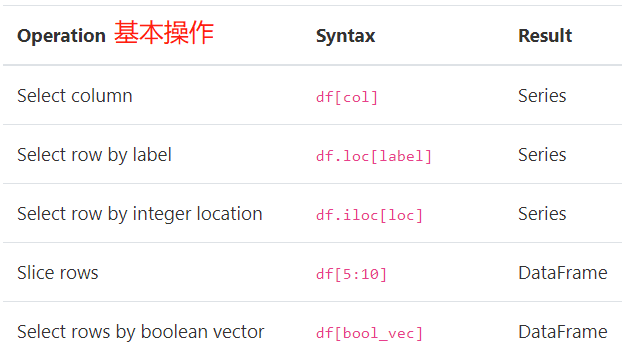

DataFrame 自动按照行和列标签执行数据对齐

In [86]:
df_1 = pd.DataFrame(
    np.array([[1,2,3],[2,3,4],[3,4,5]]),columns=["A","B","C"])
df_2 = pd.DataFrame(
    np.array([[1,2,3,4],[2,3,4,5],[3,4,5,6],[4,5,6,7]]),columns=["A","B","C","D"])
dff = df_1+df_2
dff

,A,B,C,D
0,2.0,4.0,6.0,NaN
1,4.0,6.0,8.0,NaN
2,6.0,8.0,10.0,NaN
3,NaN,NaN,NaN,NaN


In [88]:
(dff-dff.iloc[2])**2

,A,B,C,D
0,16.0,16.0,16.0,NaN
1,4.0,4.0,4.0,NaN
2,0.0,0.0,0.0,NaN
3,NaN,NaN,NaN,NaN


In [94]:
df_1.T

,0,1,2
A,1,2,3
B,2,3,4
C,3,4,5


In [95]:
np.exp(df_1)

,A,B,C
0,2.718282,7.389056,20.085537
1,7.389056,20.085537,54.598150
2,20.085537,54.598150,148.413159
